In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 124MB/s]
100% 1.06G/1.06G [00:13<00:00, 85.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalisation
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [7]:
#create CNN model
model = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu' ,input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1,activation='sigmoid'),

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds , epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 88ms/step - loss: 0.6439 - accuracy: 0.6170 - val_loss: 0.5719 - val_accuracy: 0.7066
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4862 - accuracy: 0.7639 - val_loss: 0.4741 - val_accuracy: 0.7680
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3833 - accuracy: 0.8259 - val_loss: 0.4701 - val_accuracy: 0.7884
Epoch 4/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2640 - accuracy: 0.8874 - val_loss: 0.6104 - val_accuracy: 0.7850
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1528 - accuracy: 0.9385 - val_loss: 0.6956 - val_accuracy: 0.7614
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0883 - accuracy: 0.9683 - val_loss: 0.9357 - val_accuracy: 0.7774
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0604 - accuracy: 0.9793 - val_loss: 1.1108 - val_accuracy:

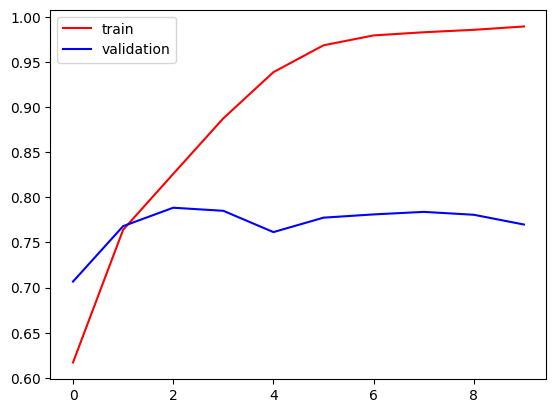

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

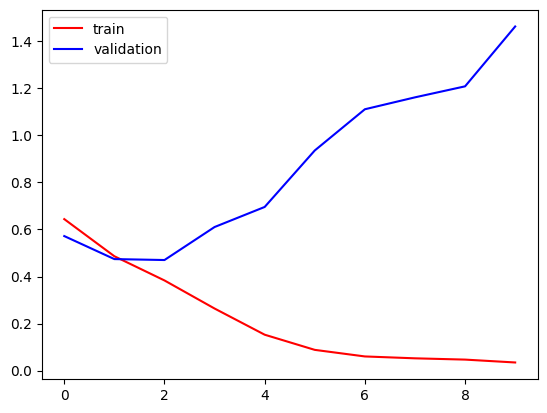

In [12]:
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [15]:
model1 = Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu' ,input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1,activation='sigmoid'),

])

In [16]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history1 = model1.fit(train_ds , epochs=10 , validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 114ms/step - loss: 0.1745 - accuracy: 0.9275 - val_loss: 0.4571 - val_accuracy: 0.8280
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1452 - accuracy: 0.9403 - val_loss: 0.7179 - val_accuracy: 0.7718
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1247 - accuracy: 0.9474 - val_loss: 0.6691 - val_accuracy: 0.8222
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.1102 - accuracy: 0.9546 - val_loss: 0.4892 - val_accuracy: 0.8284
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1023 - accuracy: 0.9602 - val_loss: 0.6539 - val_accuracy: 0.8194
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0932 - accuracy: 0.9636 - val_loss: 0.6948 - val_accuracy: 0.7454
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0842 - accuracy: 0.9664 - val_loss: 0.6419 - val_ac

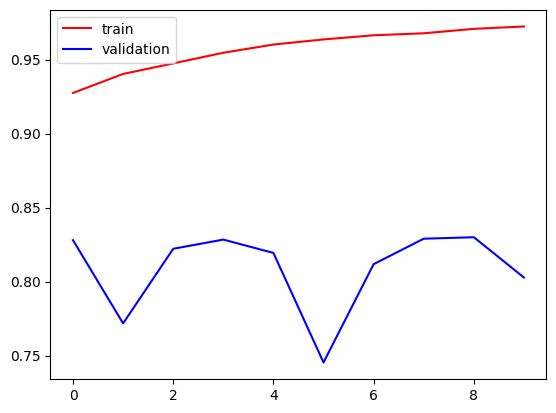

In [20]:
plt.plot(history1.history['accuracy'] , color='red' , label='train')
plt.plot(history1.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

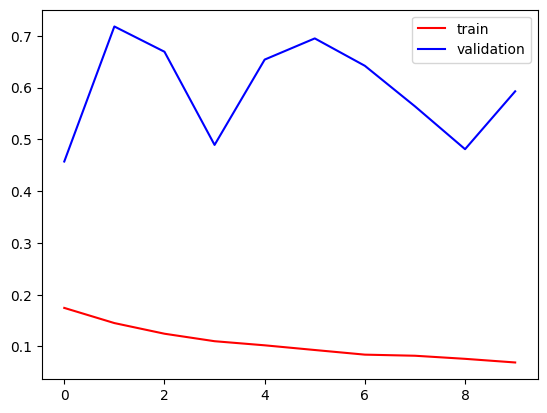

In [21]:
plt.plot(history1.history['loss'] , color='red' , label='train')
plt.plot(history1.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

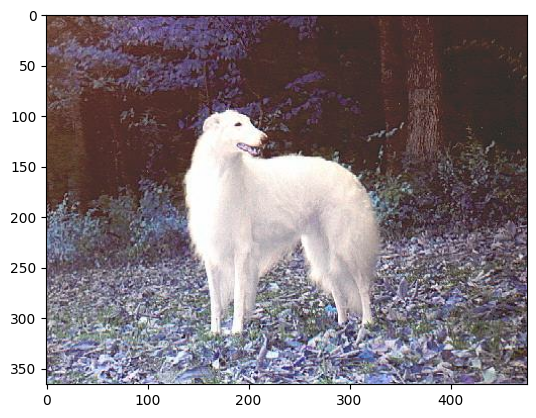

In [27]:
import cv2
img = cv2.imread('/content/dg.jpg')
plt.imshow(img)


In [28]:
img.shape

(366, 476, 3)

In [29]:
img = cv2.resize(img , (256 ,256))

In [30]:
test_input = img.reshape((1,256,256,3))

In [31]:
model1.predict(test_input)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)